In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

min_max_scal = MinMaxScaler()
scaler = StandardScaler() 

In [5]:
df = pd.read_csv('train.csv')

In [7]:
print("Cantidad de filas y columnas de dataset")
print(df.shape)

Cantidad de filas y columnas de dataset
(1460, 81)


In [11]:
#print("Cantidad de filas y columnas de dataset")
print(df.head(), '\n')

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [13]:
print('Descripción de columnas de Dataset, incluyendo conteo de valores no nulos y tipos de datos \n')
df.info()

Descripción de columnas de Dataset, incluyendo conteo de valores no nulos y tipos de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  Hou

In [10]:
print('Cantidad de valores nulos por cada columna \n')

nulls_count = df.isnull().sum()

for cols, count in nulls_count.items():
    print(f"{cols}: {count} valores nulos")

Cantidad de valores nulos por cada columna 

Id: 0 valores nulos
MSSubClass: 0 valores nulos
MSZoning: 0 valores nulos
LotFrontage: 259 valores nulos
LotArea: 0 valores nulos
Street: 0 valores nulos
Alley: 1369 valores nulos
LotShape: 0 valores nulos
LandContour: 0 valores nulos
Utilities: 0 valores nulos
LotConfig: 0 valores nulos
LandSlope: 0 valores nulos
Neighborhood: 0 valores nulos
Condition1: 0 valores nulos
Condition2: 0 valores nulos
BldgType: 0 valores nulos
HouseStyle: 0 valores nulos
OverallQual: 0 valores nulos
OverallCond: 0 valores nulos
YearBuilt: 0 valores nulos
YearRemodAdd: 0 valores nulos
RoofStyle: 0 valores nulos
RoofMatl: 0 valores nulos
Exterior1st: 0 valores nulos
Exterior2nd: 0 valores nulos
MasVnrType: 872 valores nulos
MasVnrArea: 8 valores nulos
ExterQual: 0 valores nulos
ExterCond: 0 valores nulos
Foundation: 0 valores nulos
BsmtQual: 37 valores nulos
BsmtCond: 37 valores nulos
BsmtExposure: 38 valores nulos
BsmtFinType1: 37 valores nulos
BsmtFinSF1: 0 val

In [9]:
print('Cantidad de valores nulos totales \n')
print(df.isnull().sum().sum())

Cantidad de valores nulos totales 

7829


In [6]:
nanValues = df.isnull().mean() * 100
nanValdf = pd.DataFrame({'column': df.columns , 'percent': nanValues})
nanValdf['percent'] = nanValdf['percent'].apply(lambda x: f'{x:.3f}%')

print('Proporción de valores nulos por columna \n')
pd.set_option('display.max_rows', None)
print(nanValdf)
pd.reset_option('display.max_rows')

Proporción de valores nulos por columna 

                      column  percent
Id                        Id   0.000%
MSSubClass        MSSubClass   0.000%
MSZoning            MSZoning   0.000%
LotFrontage      LotFrontage  17.740%
LotArea              LotArea   0.000%
Street                Street   0.000%
Alley                  Alley  93.767%
LotShape            LotShape   0.000%
LandContour      LandContour   0.000%
Utilities          Utilities   0.000%
LotConfig          LotConfig   0.000%
LandSlope          LandSlope   0.000%
Neighborhood    Neighborhood   0.000%
Condition1        Condition1   0.000%
Condition2        Condition2   0.000%
BldgType            BldgType   0.000%
HouseStyle        HouseStyle   0.000%
OverallQual      OverallQual   0.000%
OverallCond      OverallCond   0.000%
YearBuilt          YearBuilt   0.000%
YearRemodAdd    YearRemodAdd   0.000%
RoofStyle          RoofStyle   0.000%
RoofMatl            RoofMatl   0.000%
Exterior1st      Exterior1st   0.000%
Exterior

In [18]:
quantVar = df.select_dtypes(include=['number']).columns
qualVar = df.select_dtypes(exclude=['number']).columns

print('Las variables cualitativas son: \n', list(qualVar), '\n')
print(f'Con un total de {len(qualVar)}' '\n')

print('Las variables cuantitativas son: \n', list(quantVar), '\n')
print(f'Con un total de {len(quantVar)}' '\n')

Las variables cualitativas son: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Con un total de 43

Las variables cuantitativas son: 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGr

In [121]:
print('Para cuestiones de análisis, definiremos las siguientes variables como relevantes para la predicción de precios de casas\n')

print(
'LotArea: Tamaño del lote en pies cuadrados \n',
'Neighborhood: Ubicaciones del inmueble en Ames, Iowa\n',
'OverallQual: Calidad general del material y acabado (Del 1 al 10)\n',
'OverallCond: Calificación de general de la condición (Del 1 al 10)\n',
'YearBuilt: Año de construcción original\n',
'YearRemodAdd: Año de remodelación (será la misma fecha de construcción si no se remodeló o añadió acabados)\n',
'GrLivArea: La superficie que cubre a la propiedad al nivel del suelo\n',
'YrSold: Año de la venta\n',
'SaleType: Tipo de venta\n',
'SaleCondition: Condiciones de la venta\n'
'SalePrice: Precio de la propiedad en dólares al momento de su venta\n')

Para cuestiones de análisis, definiremos las siguientes variables como relevantes para la predicción de precios de casas

LotArea: Tamaño del lote en pies cuadrados 
 Neighborhood: Ubicaciones del inmueble en Ames, Iowa
 OverallQual: Calidad general del material y acabado (Del 1 al 10)
 OverallCond: Calificación de general de la condición (Del 1 al 10)
 YearBuilt: Año de construcción original
 YearRemodAdd: Año de remodelación (será la misma fecha de construcción si no se remodeló o añadió acabados)
 GrLivArea: La superficie que cubre a la propiedad al nivel del suelo
 YrSold: Año de la venta
 SaleType: Tipo de venta
 SaleCondition: Condiciones de la venta
SalePrice: Precio de la propiedad en dólares al momento de su venta



In [7]:
missingPercent_df = df[['LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'GrLivArea']]
nanValues = missingPercent_df.isnull().mean() * 100
nanValdf = pd.DataFrame({'column': missingPercent_df.columns , 'percent': nanValues})
nanValdf['percent'] = nanValdf['percent'].apply(lambda x: f'{x:.3f}%')

print('Proporción de valores nulos por columna en variables relevantes\n')
pd.set_option('display.max_rows', None)
print(nanValdf)
pd.reset_option('display.max_rows')

Proporción de valores nulos por columna en variables relevantes

                      column percent
LotArea              LotArea  0.000%
Neighborhood    Neighborhood  0.000%
OverallQual      OverallQual  0.000%
OverallCond      OverallCond  0.000%
YearBuilt          YearBuilt  0.000%
YearRemodAdd    YearRemodAdd  0.000%
YrSold                YrSold  0.000%
SaleType            SaleType  0.000%
SaleCondition  SaleCondition  0.000%
SalePrice          SalePrice  0.000%
GrLivArea          GrLivArea  0.000%


In [21]:
new_nan_qual = df.isnull().mean() * 100

qual_nulls = pd.DataFrame({
    'column': df.columns,

    #Variable anteriormente declarada para un nuevo dataframe en el que resumíamos la proporción total de nulos por variable 
    'null_percent': new_nan_qual
})


print('Agrupamos las variables cualitativas cuyo porcentaje de valores nulos supere el 0% pero se mantenga en un rango bajo.\nComo referencia usaremos como límite el 6%, es decir (0 < porcentaje < 6)\n')

qual_nulls.query('null_percent > 0.0 and null_percent < 6 and column in @qualVar')

Agrupamos las variables cualitativas cuyo porcentaje de valores nulos supere el 0% pero se mantenga en un rango bajo.
Como referencia usaremos como límite el 6%, es decir (0 < porcentaje < 6)



,column,null_percent
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
Electrical,Electrical,0.068493
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945
GarageCond,GarageCond,5.547945


In [9]:
qual_replCols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

#creamos una copia del dataframe original donde sobreescribiremos los valores deseados
categ_notnulls_df = df.copy()

#recorremos cada columna de nuestro dataframe para reemplazar valores vacíos por la moda en cada iteración
for col in qual_replCols:
    mode = categ_notnulls_df[col].mode()[0]
    categ_notnulls_df.fillna({col: mode}, inplace=True)
    
print('Reemplazamos nulos cualitativos por la moda\n')
print(categ_notnulls_df[qual_replCols])

Reemplazamos nulos cualitativos por la moda

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical  \
0          Gd       TA           No          GLQ          Unf      SBrkr   
1          Gd       TA           Gd          ALQ          Unf      SBrkr   
2          Gd       TA           Mn          GLQ          Unf      SBrkr   
3          TA       Gd           No          ALQ          Unf      SBrkr   
4          Gd       TA           Av          GLQ          Unf      SBrkr   
...       ...      ...          ...          ...          ...        ...   
1455       Gd       TA           No          Unf          Unf      SBrkr   
1456       Gd       TA           No          ALQ          Rec      SBrkr   
1457       TA       Gd           No          GLQ          Unf      SBrkr   
1458       TA       TA           Mn          GLQ          Rec      FuseA   
1459       TA       TA           No          BLQ          LwQ      SBrkr   

     GarageType GarageFinish GarageQual Ga

In [19]:
new_nan_quant = df.isnull().mean() * 100

quant_nulls = pd.DataFrame({
    'column': df.columns,
    'null_percent': new_nan_quant
})

"""Realizaremos el mismo procedimiento para saber las columnas afectadas por valores nulos
Esta vez viendo las columnas cuantitativas (no-categóricas)"""

print('Agrupamos las variables cuantitativas cuyo porcentaje de valores nulos supere el 0% pero no exceda el 18%\n')

quant_nulls.query('null_percent > 0.0 and null_percent < 18 and column in @quantVar')

Agrupamos las variables cuantitativas cuyo porcentaje de valores nulos supere el 0% pero no exceda el 18%



,column,null_percent
LotFrontage,LotFrontage,17.739726
MasVnrArea,MasVnrArea,0.547945
GarageYrBlt,GarageYrBlt,5.547945


In [11]:
quant_replCols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

num_notnulls_df = categ_notnulls_df.copy()

#realizamos la misma copia con datos limpios
for col in quant_replCols:
    #creamos el valor de la mediana por el cual reemplazaremos los registros numéricos
    median = num_notnulls_df[col].median()

    #cambiamos el formato de todos los numéricos vacíos a NaN
    num_notnulls_df.replace(0, np.nan, inplace=True)

    #reemplazamos con la mediana
    num_notnulls_df.fillna({col: median}, inplace=True)


print('Reemplazamos nulos cuantitativos por la mediana\n')
print(num_notnulls_df[quant_replCols])

Reemplazamos nulos cuantitativos por la mediana

      LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0       203.0       1976.0
2            68.0       162.0       2001.0
3            60.0       203.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0       203.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0       203.0       1941.0
1458         68.0       203.0       1950.0
1459         75.0       203.0       1965.0

[1460 rows x 3 columns]


Utilizamos las variables previamente definidas como "relevantes" para identificar valores atípicos que no corresponden a una tendencia de la gráfica

Relación de variables entre SalePrice y GrLivArea



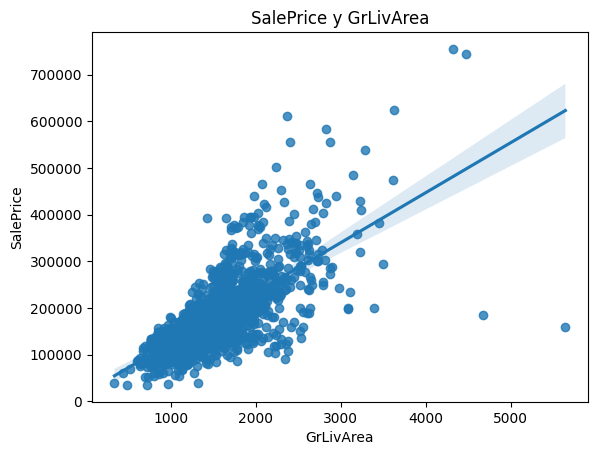

In [72]:
print('Utilizamos las variables previamente definidas como "relevantes" para identificar valores atípicos que no corresponden a una tendencia de la gráfica\n')

print('Relación de variables entre SalePrice y GrLivArea\n')
plt.title(label = 'SalePrice y GrLivArea')
salesprice_GrLivArea_scatter = sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = num_notnulls_df)

#scatter.ylabel('Detección de Outliers, comparativa de precio y terreno')

In [22]:
num_notnulls_df.query('GrLivArea > 4400')
#print(num_notnulls_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,NaN,NaN,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,NaN,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480.0,Gd,NaN,NaN,NaN,1,2008,New,Partial,160000


In [12]:
print('Removemos los outliers encontrados seleccionando especificamente el id del registro correspondiente \n')

cleaning_outliers = num_notnulls_df.drop(num_notnulls_df[num_notnulls_df['Id'] == 1299].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 524].index)

cleaning_outliers.query('GrLivArea > 4400')

Removemos los outliers encontrados seleccionando especificamente el id del registro correspondiente 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,NaN,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'Correlacion entre variables OverallCond y SalePrice')

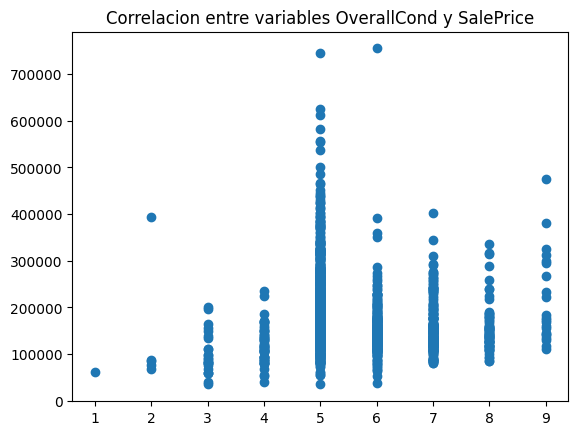

In [56]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data = cleaning_outliers)
plt.title(label = 'Correlacion entre variables OverallCond y SalePrice')

In [60]:
cleaning_outliers.query('OverallCond == 5 & SalePrice >  700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,NaN,7,2007,WD,Abnorml,745000


In [61]:
cleaning_outliers.query('OverallCond == 6 & SalePrice >  700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,1,2007,WD,Normal,755000


In [62]:
cleaning_outliers.query('OverallCond == 2 & SalePrice >  300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,6,2010,New,Partial,394432


In [63]:
cleaning_outliers.query('OverallCond == 9 & SalePrice >  400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,GdPrv,NaN,NaN,6,2006,WD,Normal,475000


In [65]:
print('Limpieza de valores atipicos para variables independientes Condicion general y Precio de la venta\n')

Limpieza de valores atipicos para variables independientes Condicion general y Precio de la venta



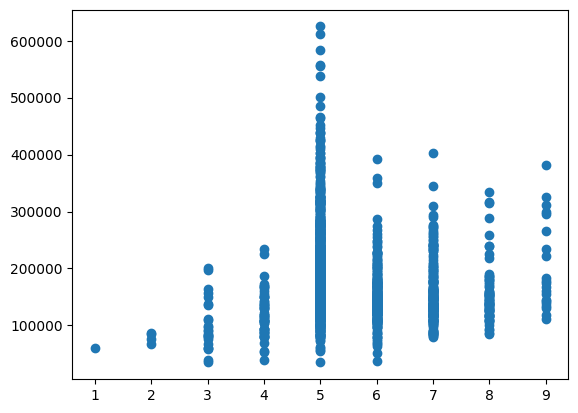

In [64]:
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 1183].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 692].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 379].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 186].index)

plt.scatter(x = 'OverallCond', y = 'SalePrice', data = cleaning_outliers)

Text(0.5, 1.0, 'Correlacion entre variables LotArea y SalePrice')

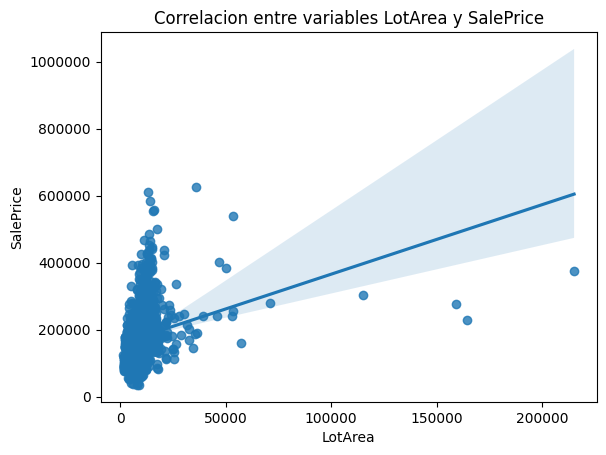

In [81]:
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='y')

sns.regplot(x = "LotArea",  y = "SalePrice", data = cleaning_outliers)
plt.title(label = 'Correlacion entre variables LotArea y SalePrice')

In [88]:
print('Hallando Outliers entre variables\n')

cleaning_outliers.query('LotArea > 100000 & SalePrice <  400000')

Hallando Outliers entre variables



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,69.0,159000,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,Shed,500.0,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,NaN,NaN,NaN,NaN,NaN,6,2009,WD,Normal,375000
335,336,190,RL,69.0,164660,Grvl,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,Shed,700.0,8,2008,WD,Normal,228950
706,707,20,RL,69.0,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,NaN,NaN,6,2007,WD,Normal,302000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

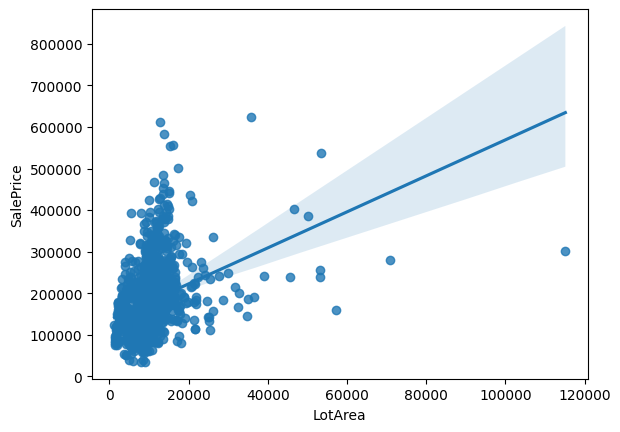

In [89]:
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 314].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 250].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 336].index)

sns.regplot(x = "LotArea",  y = "SalePrice", data = cleaning_outliers)

In [90]:
cleaning_outliers.query('LotArea > 100000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
706,707,20,RL,69.0,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,NaN,NaN,6,2007,WD,Normal,302000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

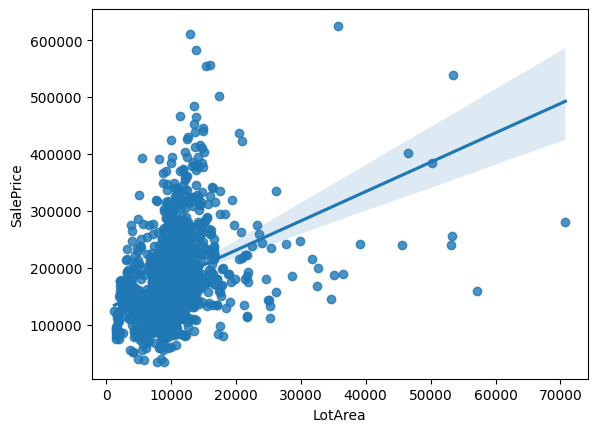

In [91]:
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 707].index)

sns.regplot(x = "LotArea",  y = "SalePrice", data = cleaning_outliers)

Text(0, 0.5, 'SalePrice')

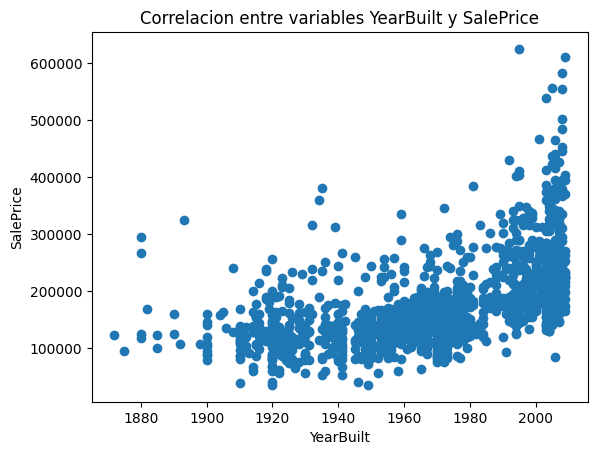

In [98]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = cleaning_outliers)
plt.title(label = 'Correlacion entre variables YearBuilt y SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

In [99]:
cleaning_outliers.query('YearBuilt < 1900 & SalePrice >  200000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,5,2008,WD,Normal,295000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,7,2008,WD,Normal,325000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,5,2009,WD,Normal,265979


In [100]:
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 305].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 584].index)
cleaning_outliers = cleaning_outliers.drop(num_notnulls_df[num_notnulls_df['Id'] == 748].index)

print('Eliminamos outliers con respecto a la tendencia de precios con respecto al anio de construccion\n')
cleaning_outliers.query('YearBuilt < 1900 & SalePrice >  200000')

Eliminamos outliers con respecto a la tendencia de precios con respecto al anio de construccion



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [103]:
print('Transformacion de variables numericas\n\nLotArea\nGrLivArea\nSalePrice')

Transformacion de variables numericas

LotArea
GrLivArea
SalePrice


In [13]:
#Creacion de nuevo DF para el paso de transformacion, estandarizacion y normalizacion
transformed_df = cleaning_outliers.copy()

In [128]:
print('''Si queremos que todas las caracteristicas de estas variables se encuentren en una escala comparable, 
transformamos sus valores en una nueva columna "LotArea_standarized"\n ''')

transformed_df['LotArea_standarized'] = scaler.fit_transform(transformed_df[['LotArea']])
transformed_df['GrLivArea_standarized'] = scaler.fit_transform(transformed_df[['GrLivArea']])
transformed_df['SalePrice_standarized'] = scaler.fit_transform(transformed_df[['SalePrice']])

Si queremos que todas las caracteristicas de estas variables se encuentren en una escala comparable, 
transformamos sus valores en una nueva columna "LotArea_standarized"
 


In [134]:
print('''Con minmaxscaler, tomamos los valores para transformar, los colocamos en un rango entre 0 y 1 
Y los escalamos''')

transformed_df['LotArea_normalized'] = min_max_scal.fit_transform(transformed_df[['LotArea']])
transformed_df['GrLivArea_normalized'] = min_max_scal.fit_transform(transformed_df[['GrLivArea']])
transformed_df['SalePrice_normalized'] = min_max_scal.fit_transform(transformed_df[['SalePrice']])

Con minmaxscaler, tomamos los valores para transformar, los colocamos en un rango entre 0 y 1 
Y los escalamos


In [136]:
print('''Dado que existen sesgos para las siguientes variables, transformamos logaritmicamente los valores 
para encontrar la cantidad de extremos que se forman''')

transformed_df['LotArea_log'] = np.log(df['LotArea'])
transformed_df['GrLivArea_log'] = np.log(df['GrLivArea'])
transformed_df['SalePrice_log'] = np.log(df['SalePrice'])

Dado que existen sesgos para las siguientes variables, transformamos logaritmicamente los valores 
para encontrar la cantidad de extremos que se forman


<Axes: ylabel='LotArea_log'>

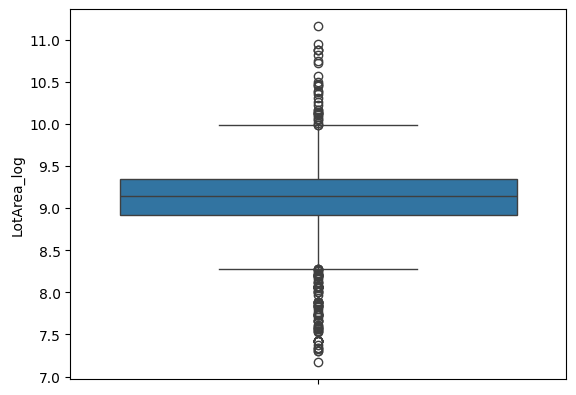

In [125]:
sns.boxplot(transformed_df['LotArea_log'])

<Axes: ylabel='GrLivArea_log'>

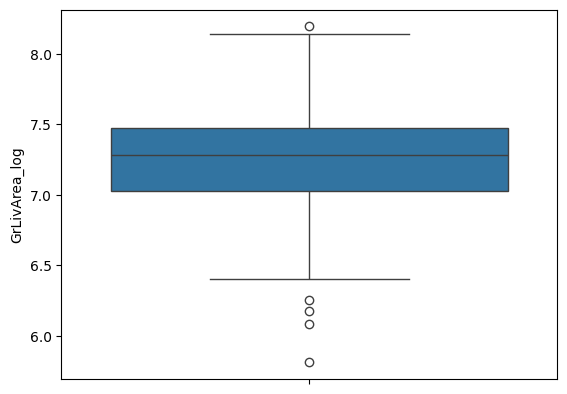

In [126]:
sns.boxplot(transformed_df['GrLivArea_log'])

<Axes: ylabel='SalePrice_log'>

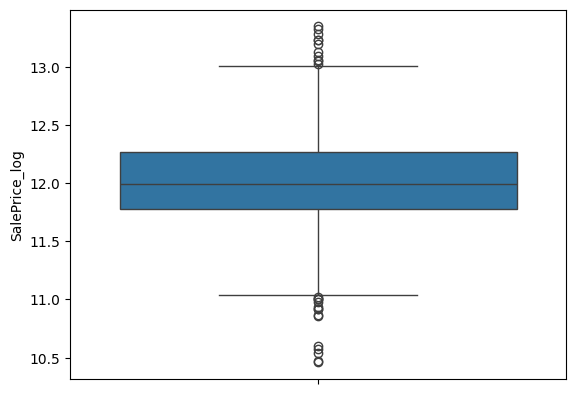

In [127]:
sns.boxplot(transformed_df['SalePrice_log'])

In [140]:
#Etapa de Ingenieria de caracteristicas

print('''Si se requiere, se pueden formar nuevas caracteristicas que nos digan mas datos a partir del acoplamiento de variables ya existentes.
Para esta fase ocuparemos variables categoricas que ya manejan escalas, de manera ordinal, como es el caso de:

ExterQual
ExterCond

Por otro lado para centralizar por completo la fecha de construccion del inmueble, juntaremos

YearBuilt
YearRemodAdd''')

Si se requiere, se pueden formar nuevas caracteristicas que nos digan mas datos a partir del acoplamiento de variables ya existentes.
Para esta fase ocuparemos variables categoricas que ya manejan escalas, de manera ordinal, como es el caso de:

ExterQual
ExterCond

Por otro lado para centralizar por completo la fecha de construccion del inmueble, juntaremos

YearBuilt
YearRemodAdd


In [15]:
#nuevo DF para nueva etapa
transformed_var = transformed_df.copy()
transformed_var['Exter_Nominal'] = transformed_var['ExterQual'] + transformed_var['ExterCond']
transformed_var['YearBuilt_n_Remod'] = transformed_var['YearBuilt'] + transformed_var['YearRemodAdd']

In [31]:
#Segmentación de DF en no categóricos y categóricos
transformed_final_df = pd.get_dummies(transformed_var[qualVar], drop_first=True, dtype = int)
non_cat_df = transformed_var.drop(columns = qualVar)

#concatenación de ambos DF con numéricos y categóricos
final_data_df = pd.concat([non_cat_df, transformed_final_df], axis = 1)
print(final_data_df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0       706.0  ...               0               0   
1          1976       203.0       978.0  ...               0               0   
2          2002       162.0       486.0  ...               0               0   
3          1970       203.0       216.0  ...               0               0   
4          2000       350.0       655.0  ...               0               0   

   SaleType_New  SaleType_Oth  SaleTyp

In [30]:
final_data_df.to_csv('preprocessed_housesPrice.csv')